#CDR DATASET


###Introduction
The Mobile phone activity dataset is composed by one week of Call Details Records (CDRs).

###Description of the dataset
Every time a user engages a telecommunication interaction, a Radio Base Station (RBS) is assigned by the operator and delivers the communication through the network. Then, a new CDR is created recording the time of the interaction and the RBS which handled it.

The following activities are present in the dataset:

- received SMS
- sent SMS
- incoming calls
- outgoing calls
- Internet activity: In particular, Internet activity is generated each time a user starts an Internet connection or ends an Internet connection.

Moreover, during the same connection a CDR is generated if the connection lasts for more than 15 min or the user transferred more than 5 MB.


The datasets is spatially aggregated in a square cells grid. The area is composed of a grid overlay of 1,000 (squares with size of about 235×235 meters.

This grid is projected with the WGS84 (EPSG:4326) standard. For more details, check out the original paper http://go.nature.com/2fcOX5E

The data provides CellID, CountryCode and all the aforementioned telecommunication activities aggregated every 60 minutes.


Learn More about: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity

# Importing Dataset

- We are getting the dataset from Kaggle: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity

### This is how you mount you kaggle to google colab

In [2]:
# See My Medium Notebook for guidance:

#Method 2
import json
!pip install -q kaggle

# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Upload kaggle.json (contains your API credentials)
from google.colab import files
# files.upload()  # Upload kaggle.json manually

# Step 4: Move kaggle.json to the correct location in you drive
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions list

Mounted at /content/drive
cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [3]:
#Method 1(better mosre secured)

from google.colab import userdata
import os

# Store your credentials in Colab Secrets first (see below)
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

!kaggle datasets download -d marcodena/mobile-phone-activity #marcodena/mobile-phone-activity
!unzip mobile-phone-activity.zip


Dataset URL: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity
License(s): DbCL-1.0
 88% 212M/242M [00:00<00:00, 428MB/s]
100% 242M/242M [00:00<00:00, 469MB/s]
Archive:  mobile-phone-activity.zip
  inflating: ISTAT_census_variables_2011.csv  
  inflating: Italian_provinces.geojson  
  inflating: mi-to-provinces-2013-11-01.csv  
  inflating: mi-to-provinces-2013-11-02.csv  
  inflating: mi-to-provinces-2013-11-03.csv  
  inflating: mi-to-provinces-2013-11-04.csv  
  inflating: mi-to-provinces-2013-11-05.csv  
  inflating: mi-to-provinces-2013-11-06.csv  
  inflating: mi-to-provinces-2013-11-07.csv  
  inflating: milano-grid.geojson     
  inflating: sms-call-internet-mi-2013-11-01.csv  
  inflating: sms-call-internet-mi-2013-11-02.csv  
  inflating: sms-call-internet-mi-2013-11-03.csv  
  inflating: sms-call-internet-mi-2013-11-04.csv  
  inflating: sms-call-internet-mi-2013-11-05.csv  
  inflating: sms-call-internet-mi-2013-11-06.csv  
  inflating: sms-call-internet-mi-20

## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import os

##Question:

- How many files are there in total?
- What do you notice about the file names?
- Why are there 7 files for SMS/calls/internet?
- What might 'mi-to-provinces' mean?
- Which is the largest file?

In [5]:
files = [f for f in os.listdir() if f.endswith('.csv') or f.endswith('.geojson')]
print('*'*70)
print(f"What does this folder contain: Found {len(files)} data files:")
print('*'*70)
for i, f in enumerate(sorted(files), 1):
    size = os.path.getsize(f) / 1024**2  # Size in MB
    print(f"  {i:2d}. {f:50s} ({size:6.2f} MB)")

**********************************************************************
What does this folder contain: Found 17 data files:
**********************************************************************
   1. ISTAT_census_variables_2011.csv                    (  0.08 MB)
   2. Italian_provinces.geojson                          (  7.66 MB)
   3. mi-to-provinces-2013-11-01.csv                     ( 94.09 MB)
   4. mi-to-provinces-2013-11-02.csv                     ( 93.68 MB)
   5. mi-to-provinces-2013-11-03.csv                     ( 86.78 MB)
   6. mi-to-provinces-2013-11-04.csv                     (133.25 MB)
   7. mi-to-provinces-2013-11-05.csv                     (137.29 MB)
   8. mi-to-provinces-2013-11-06.csv                     (137.76 MB)
   9. mi-to-provinces-2013-11-07.csv                     (136.75 MB)
  10. milano-grid.geojson                                (  3.02 MB)
  11. sms-call-internet-mi-2013-11-01.csv                ( 79.40 MB)
  12. sms-call-internet-mi-2013-11-02.csv      

### Lets LOAD and explore one day of activity

In [6]:
cdr_df = pd.read_csv("sms-call-internet-mi-2013-11-01.csv")
cdr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891928 entries, 0 to 1891927
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   datetime     object 
 1   CellID       int64  
 2   countrycode  int64  
 3   smsin        float64
 4   smsout       float64
 5   callin       float64
 6   callout      float64
 7   internet     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 115.5+ MB


In [7]:
print("\nFirst 10 rows:")
cdr_df.head(10)


First 10 rows:


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-01 00:00:00,1,0,0.3521,NaN,NaN,0.0273,NaN
1,2013-11-01 00:00:00,1,33,NaN,NaN,NaN,NaN,0.0261
2,2013-11-01 00:00:00,1,39,1.7322,1.1047,0.5919,0.4020,57.7729
3,2013-11-01 00:00:00,2,0,0.3581,NaN,NaN,0.0273,NaN
4,2013-11-01 00:00:00,2,33,NaN,NaN,NaN,NaN,0.0274
5,2013-11-01 00:00:00,2,39,1.7334,1.0880,0.6020,0.4109,57.8875
6,2013-11-01 00:00:00,3,0,0.3644,NaN,NaN,0.0273,NaN
7,2013-11-01 00:00:00,3,33,NaN,NaN,NaN,NaN,0.0287
8,2013-11-01 00:00:00,3,39,1.7348,1.0701,0.6128,0.4203,58.0095
9,2013-11-01 00:00:00,4,0,0.3349,NaN,NaN,0.0273,NaN


In [8]:
# Basic exploration
print(f"\nDataset Shape: {cdr_df.shape[0]:,} rows × {cdr_df.shape[1]} columns")

print(f"\nColumns:")
for col in cdr_df.columns:
    print(f"   - {col}")

print("\n Data types:")
print(cdr_df.dtypes)

print(f"\n Data description:")
cdr_df.describe()



Dataset Shape: 1,891,928 rows × 8 columns

Columns:
   - datetime
   - CellID
   - countrycode
   - smsin
   - smsout
   - callin
   - callout
   - internet

 Data types:
datetime        object
CellID           int64
countrycode      int64
smsin          float64
smsout         float64
callin         float64
callout        float64
internet       float64
dtype: object

 Data description:


,CellID,countrycode,smsin,smsout,callin,callout,internet
count,1.891928e+06,1.891928e+06,805775.000000,469482.000000,484147.000000,854515.000000,804854.000000
mean,5.277812e+03,3.538213e+02,5.716717,6.011796,5.417363,3.741025,102.477277
std,2.719573e+03,4.287521e+03,15.503784,16.953823,15.915312,13.986531,342.024253
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.153000e+03,3.300000e+01,0.129300,0.109600,0.075200,0.060700,0.058300
50%,5.387000e+03,4.100000e+01,0.772400,0.755200,0.385000,0.236900,0.230200
75%,7.492000e+03,8.600000e+01,4.468400,4.627375,3.179100,1.206000,42.447725
max,1.000000e+04,9.725900e+04,1109.082000,1577.903800,988.576700,1024.899200,27774.298900


###Question:
- What does each row represent?

###Lets dive enven deeper intor the data exploration

In [10]:
# Let's understand the structure better

print("\n" + "="*70)
print("UNDERSTANDING THE DATA STRUCTURE")
print("="*70)

# How many unique grid squares?
print(f"\nAll non-unique grid squares (CID): {len(cdr_df['CellID'])}")

print(f"All Unique grid squares (CID): {cdr_df['CellID'].nunique()}")
'''Could still have this with this
print(f"How many different CID are there:{len(cdr_df['CellID'].value_counts())}")'''

# Let's look at one grid square
sample_cid = cdr_df['CellID'].iloc[0]
print(f"\nSample grid square: {sample_cid}\n")

#we look only at a unique grip sqaure (CID=1)
print(f"\nSample grid square for CID= 1 only")
single_cid_1=cdr_df[cdr_df['CellID'] == sample_cid]
single_cid_1


UNDERSTANDING THE DATA STRUCTURE

All non-unique grid squares (CID): 1891928
All Unique grid squares (CID): 10000

Sample grid square: 1


Sample grid square for CID= 1 only


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-01 00:00:00,1,0,0.3521,NaN,NaN,0.0273,NaN
1,2013-11-01 00:00:00,1,33,NaN,NaN,NaN,NaN,0.0261
2,2013-11-01 00:00:00,1,39,1.7322,1.1047,0.5919,0.4020,57.7729
54581,2013-11-01 01:00:00,1,0,0.1378,NaN,NaN,0.0309,NaN
54582,2013-11-01 01:00:00,1,39,1.0259,0.7700,0.1906,0.1633,44.0469
...,...,...,...,...,...,...,...,...
1757405,2013-11-01 22:00:00,1,48,0.0261,NaN,NaN,NaN,NaN
1829008,2013-11-01 23:00:00,1,0,0.4205,NaN,NaN,0.0523,NaN
1829009,2013-11-01 23:00:00,1,1,0.0261,NaN,NaN,NaN,NaN
1829010,2013-11-01 23:00:00,1,39,1.8767,1.4788,0.3539,0.6070,58.8158


In [14]:
#double checking that we are dealing with only one CID
cdr_df[cdr_df['CellID'] == sample_cid].CellID.value_counts()

,count
CellID,
1,114


##Question:
- What are the different activities in the CDR
- This CDR comprises call to and from which countires, list them all
- How many of these call were incoming, how many were outgoing?

##Lets focus on a single grid CID 1 for now

In [15]:
single_cid_1

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-01 00:00:00,1,0,0.3521,NaN,NaN,0.0273,NaN
1,2013-11-01 00:00:00,1,33,NaN,NaN,NaN,NaN,0.0261
2,2013-11-01 00:00:00,1,39,1.7322,1.1047,0.5919,0.4020,57.7729
54581,2013-11-01 01:00:00,1,0,0.1378,NaN,NaN,0.0309,NaN
54582,2013-11-01 01:00:00,1,39,1.0259,0.7700,0.1906,0.1633,44.0469
...,...,...,...,...,...,...,...,...
1757405,2013-11-01 22:00:00,1,48,0.0261,NaN,NaN,NaN,NaN
1829008,2013-11-01 23:00:00,1,0,0.4205,NaN,NaN,0.0523,NaN
1829009,2013-11-01 23:00:00,1,1,0.0261,NaN,NaN,NaN,NaN
1829010,2013-11-01 23:00:00,1,39,1.8767,1.4788,0.3539,0.6070,58.8158


In [16]:
sms_out =  single_cid_1['smsout'].notna()
sms_outgoing = single_cid_1[sms_out]
print(f"   The Shape of the datasets with non Nan Outgoing call only: {sms_outgoing.shape}")
sms_outgoing

   The Shape of the datasets with non Nan Outgoing call only: (35, 8)


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
2,2013-11-01 00:00:00,1,39,1.7322,1.1047,0.5919,0.4020,57.7729
54582,2013-11-01 01:00:00,1,39,1.0259,0.7700,0.1906,0.1633,44.0469
100058,2013-11-01 02:00:00,1,39,0.3883,0.3004,0.0279,0.1360,41.1798
138762,2013-11-01 03:00:00,1,39,1.1248,0.8957,0.0018,0.0261,33.0221
177160,2013-11-01 04:00:00,1,39,0.3491,0.5112,0.0054,0.0261,31.3769
215340,2013-11-01 05:00:00,1,39,0.1135,0.1954,0.0279,0.1319,34.8155
257255,2013-11-01 06:00:00,1,39,0.1093,0.1158,0.2168,0.1045,35.4161
306793,2013-11-01 07:00:00,1,39,0.5813,0.2447,0.2435,0.4946,42.9335
369987,2013-11-01 08:00:00,1,0,1.4571,0.0273,0.0523,0.0179,NaN
369988,2013-11-01 08:00:00,1,39,2.2078,1.4093,1.1086,1.2328,59.8808


#Lets visualize

In [17]:
#converting the datetime into day, month, year,hour, ninutes, secons
sms_outgoing['datetime'] = pd.to_datetime(sms_outgoing['datetime']) #converting it into a datefime type

sms_outgoing['date'] = sms_outgoing['datetime'].dt.date
sms_outgoing['hour'] = sms_outgoing['datetime'].dt.hour
sms_outgoing.columns

/tmp/ipython-input-457596189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_outgoing['datetime'] = pd.to_datetime(sms_outgoing['datetime']) #converting it into a datefime type
/tmp/ipython-input-457596189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_outgoing['date'] = sms_outgoing['datetime'].dt.date
/tmp/ipython-input-457596189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

Index(['datetime', 'CellID', 'countrycode', 'smsin', 'smsout', 'callin',
       'callout', 'internet', 'date', 'hour'],
      dtype='object')

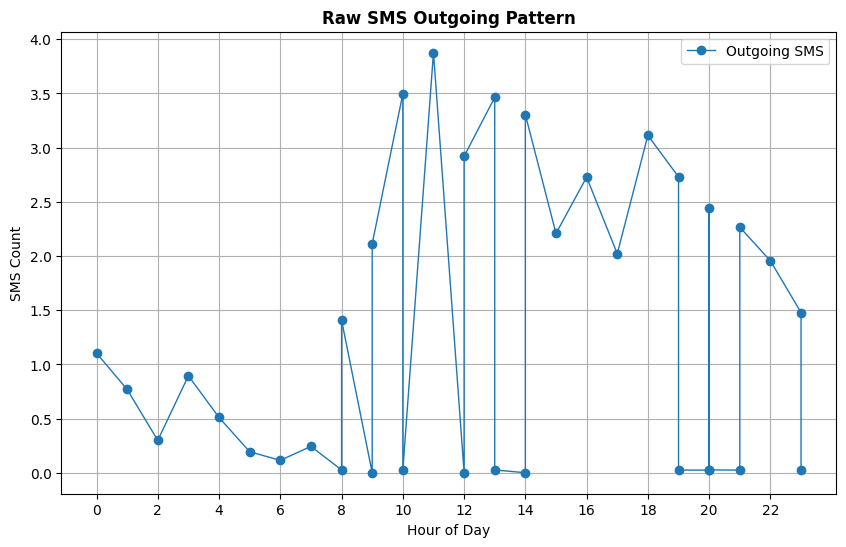

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))


# Plot 1: Raw data
plt.plot(sms_outgoing['hour'], sms_outgoing['smsout'], marker='o', linewidth=1, markersize=6, label='Outgoing SMS')
plt.title('Raw SMS Outgoing Pattern', fontweight='bold', fontsize=12)
plt.xlabel('Hour of Day')
plt.ylabel('SMS Count')
plt.xticks(range(0, 24, 2))
plt.grid(True)
plt.legend();


## Hand on : Pick a different grid square and find its peak SMS hour.

#Assignment 1

##Assignment Overview

Total Points: 100

Duration: 2 weeks (Tuesday Jan 20th, 6 am  - Wednesday Feb 04rd,6am)

Deliverables:

  - Jupyter notebook (.ipynb) or Module(.py) with answers and visualizations
  - README explaining your approach(2 pages)
    - Overview of your approach
    - Key decisions you made (e.g., how you handled missing values)
    - Summary of key findings
  - All submissions should be hosted on your github account.(submit the link to the repo alongside your homework)


###TASK 1: Load and Merge data

1. Load 3 SMS/call/internet activity data (sms-call-internet-mi-2013-11-02.csv,
sms-call-internet-mi-2013-11-04.csv, sms-call-internet-mi-2013-11-06.csv) and combine them.

2. Create a clean, analysis-ready dataset.

####Requirements:
- Load all 3 activity files
- Add date and time columns
- Combine into single dataframe
- Handle any missing values (Hint: Fill with mean)
- Add aggregate columns (total_sms, total_calls, total_internet)

####Questions (50 points):
- How many total records across all 3 datasets? (10)
- How many unique grid squares (CellID) are there? (5)
- How many unique country codes appear in the data? (5)
- Are there any missing values?
  - If yes, input missing/NaN with the mean of each columns. (10)
  - For which columns are missing values most common? (5)
  - How many records did you modify? (5)

- What is the most common peak hour across all grids? (5)
  - What hour has the lowest activity? (5)
  - Calculate and report: mean, median, std, min, max for total calls by hour (15)

- What percentage of total activity happens during daytime (6am-8pm) vs nighttime(8 pm -6 am)? (5)


- Do international calls happen at different times than domestic? (compare hourly patterns) (5)

- Use numpy to perform statistical comparisons between different conditions. (5)

  Compare:
    1. Domestic (Italy) vs International calls.
        - What percentage of calls are international vs domestic? (5)
        - What percentage of SMS are international vs domestic? (5)
        - Are international calls more incoming or outgoing (calculate the ratio) (5)
    2. Different activity types.
        - Is there a correlation between SMS volume and Call volume at the grid level? (5)

## TASK 1: Load and Merge data

1. Load 3 SMS/call/internet activity data (sms-call-internet-mi-2013-11-02.csv, sms-call-internet-mi-2013-11-04.csv, sms-call-internet-mi-2013-11-06.csv) and combine them.



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Load the three datasets
file1 = 'sms-call-internet-mi-2013-11-02.csv'
file2 = 'sms-call-internet-mi-2013-11-04.csv'
file3 = 'sms-call-internet-mi-2013-11-06.csv'

# Read the CSV files
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

# Add date column to each dataframe to track which file they came from
df1['date'] = '2013-11-02'
df2['date'] = '2013-11-04'
df3['date'] = '2013-11-06'

print("Dataset 1 shape:", df1.shape)
print("Dataset 2 shape:", df2.shape)
print("Dataset 3 shape:", df3.shape)
print("\nFirst few rows of Dataset 1:")
print(df1.head())

2. Create a clean, analysis-ready dataset.

In [51]:
# Combine all three datasets into a single dataframe
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

print("Combined dataset shape:", combined_df.shape)
print("\n" + "="*80)

# Check the columns
print("\nColumn names:")
print(combined_df.columns.tolist())

# The dataset already has a 'datetime' column! Let's convert it to proper datetime format
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])

# Extract hour from the datetime column
combined_df['hour'] = combined_df['datetime'].dt.hour

print("\n" + "="*80)
print("\nDatetime information:")
print(f"Date range: {combined_df['datetime'].min()} to {combined_df['datetime'].max()}")
print(f"Hour values range: {combined_df['hour'].min()} to {combined_df['hour'].max()}")

# Check for missing values
print("\n" + "="*80)
print("\nMissing values before imputation:")
missing_before = combined_df.isnull().sum()
print(missing_before[missing_before > 0])
print(f"\nTotal missing values: {combined_df.isnull().sum().sum()}")

# Count records with any missing values
records_with_missing = combined_df.isnull().any(axis=1).sum()
print(f"Number of records with missing values: {records_with_missing}")

# Identify which columns have the most missing values
print("\n" + "="*80)
print("\nColumns with missing values (sorted by count):")
missing_summary = combined_df.isnull().sum().sort_values(ascending=False)
missing_summary = missing_summary[missing_summary > 0]
for col, count in missing_summary.items():
    percentage = (count / len(combined_df)) * 100
    print(f"  {col}: {count:,} missing ({percentage:.2f}%)")

# Handle missing values - fill with mean for numeric columns
print("\n" + "="*80)
print("\nFilling missing values with column means...")
numeric_columns = combined_df.select_dtypes(include=[np.number]).columns
modified_records = 0
for col in numeric_columns:
    missing_count = combined_df[col].isnull().sum()
    if missing_count > 0:
        mean_value = combined_df[col].mean()
        combined_df[col].fillna(mean_value, inplace=True)
        modified_records += missing_count
        print(f"   '{col}': filled {missing_count:,} values with mean = {mean_value:.4f}")

print("\n" + "="*80)
print(f"\nTotal records modified: {modified_records:,}")
print(f"Missing values after imputation: {combined_df.isnull().sum().sum()}")

# Identify activity columns
print("\n" + "="*80)
print("\nActivity columns in dataset:")
sms_columns = [col for col in combined_df.columns if 'sms' in col.lower()]
call_columns = [col for col in combined_df.columns if 'call' in col.lower()]
internet_columns = [col for col in combined_df.columns if 'internet' in col.lower()]

print(f"  SMS columns: {sms_columns}")
print(f"  Call columns: {call_columns}")
print(f"  Internet columns: {internet_columns}")

# Create aggregate columns
print("\n" + "="*80)
print("\nCreating aggregate columns...")

if len(sms_columns) > 0:
    combined_df['total_sms'] = combined_df[sms_columns].sum(axis=1)
    print(f"  Created 'total_sms' (sum of {sms_columns})")

if len(call_columns) > 0:
    combined_df['total_calls'] = combined_df[call_columns].sum(axis=1)
    print(f"  Created 'total_calls' (sum of {call_columns})")

if len(internet_columns) > 0:
    combined_df['total_internet'] = combined_df[internet_columns].sum(axis=1)
    print(f"  Created 'total_internet' (sum of {internet_columns})")

# Create total_activity column (sum of all activities)
combined_df['total_activity'] = combined_df[['total_sms', 'total_calls', 'total_internet']].sum(axis=1)
print(f"  Created 'total_activity' (sum of all activities)")

print("\n" + "="*80)
print("\nFinal dataset summary:")
print(f"  Total records: {len(combined_df):,}")
print(f"  Total columns: {len(combined_df.columns)}")
print(f"  Memory usage: {combined_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "="*80)
print("\nFirst 10 rows of cleaned dataset:")
print(combined_df.head(10))

print("\n" + "="*80)
print("\nDescriptive statistics for aggregate columns:")
print(combined_df[['total_sms', 'total_calls', 'total_internet', 'total_activity']].describe())

Combined dataset shape: (6564031, 9)


Column names:
['datetime', 'CellID', 'countrycode', 'smsin', 'smsout', 'callin', 'callout', 'internet', 'date']


Datetime information:
Date range: 2013-11-02 00:00:00 to 2013-11-06 23:00:00
Hour values range: 0 to 23


Missing values before imputation:
smsin       3964171
smsout      5025738
callin      4761685
callout     3764484
internet    3621117
dtype: int64

Total missing values: 21137195
Number of records with missing values: 5880441


Columns with missing values (sorted by count):
  smsout: 5,025,738 missing (76.56%)
  callin: 4,761,685 missing (72.54%)
  smsin: 3,964,171 missing (60.39%)
  callout: 3,764,484 missing (57.35%)
  internet: 3,621,117 missing (55.17%)


Filling missing values with column means...
   'smsin': filled 3,964,171 values with mean = 7.8620
   'smsout': filled 5,025,738 values with mean = 7.4408
   'callin': filled 4,761,685 values with mean = 7.7386
   'callout': filled 3,764,484 values with mean = 5.6867
   'inter

Answer Basic Dataset Questions (Questions 1-3)

In [27]:
# QUESTION 1: How many total records across all 3 datasets?
total_records = len(combined_df)
print("="*80)
print("QUESTION 1: How many total records across all 3 datasets?")
print("="*80)
print(f"Total records: {total_records:,}")

# Break down by dataset
records_by_date = combined_df['date'].value_counts().sort_index()
print(f"\nBreakdown by date:")
for date, count in records_by_date.items():
    percentage = (count / total_records) * 100
    print(f"  {date}: {count:,} records ({percentage:.2f}%)")

# QUESTION 2: How many unique grid squares (CellID) are there?
unique_cells = combined_df['CellID'].nunique()
print("\n" + "="*80)
print("QUESTION 2: How many unique grid squares (CellID) are there?")
print("="*80)
print(f"Unique grid squares (CellID): {unique_cells:,}")
print(f"\nCellID range: {combined_df['CellID'].min()} to {combined_df['CellID'].max()}")

# Top 10 most active grid squares
top_cells = combined_df['CellID'].value_counts().head(10)
print(f"\nTop 10 most active grid squares:")
for cell, count in top_cells.items():
    print(f"  CellID {cell}: {count:,} records")

# QUESTION 3: How many unique country codes appear in the data?
unique_countries = combined_df['countrycode'].nunique()
print("\n" + "="*80)
print("QUESTION 3: How many unique country codes appear in the data?")
print("="*80)
print(f"Unique country codes: {unique_countries:,}")

# Show all country codes with their frequencies
country_counts = combined_df['countrycode'].value_counts().sort_index()
print(f"\nCountry code distribution:")
for country, count in country_counts.items():
    percentage = (count / total_records) * 100
    country_name = "Italy (Domestic)" if country == 39 else f"Country code {country}"
    print(f"  {country_name}: {count:,} records ({percentage:.2f}%)")

QUESTION 1: How many total records across all 3 datasets?
Total records: 6,564,031

Breakdown by date:
  2013-11-02: 1,847,331 records (28.14%)
  2013-11-04: 2,299,544 records (35.03%)
  2013-11-06: 2,417,156 records (36.82%)

QUESTION 2: How many unique grid squares (CellID) are there?
Unique grid squares (CellID): 10,000

CellID range: 1 to 10000

Top 10 most active grid squares:
  CellID 6064: 2,856 records
  CellID 6165: 2,759 records
  CellID 6065: 2,532 records
  CellID 6066: 2,449 records
  CellID 6164: 2,429 records
  CellID 5161: 2,421 records
  CellID 5160: 2,337 records
  CellID 5159: 2,320 records
  CellID 5965: 2,232 records
  CellID 5866: 2,207 records

QUESTION 3: How many unique country codes appear in the data?
Unique country codes: 302

Country code distribution:
  Country code 0: 680,922 records (10.37%)
  Country code 1: 151,616 records (2.31%)
  Country code 7: 82,956 records (1.26%)
  Country code 20: 248,855 records (3.79%)
  Country code 27: 9,357 records (0.14%

Missing Values Analysis (Questions 4-6)

In [28]:
# =============================================================================
# QUESTION 4-6: Missing Values Analysis
# =============================================================================
print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

# Question: Are there any missing values?
print("\nQUESTION 4a: Are there any missing values?")
print("Answer: The missing values have been filled with means during data cleaning.")
print("\nOriginal missing values (before imputation):")

# Recreate the original missing value analysis from earlier
# We need to reload the data to show original missing values
df1_temp = pd.read_csv('sms-call-internet-mi-2013-11-02.csv')
df2_temp = pd.read_csv('sms-call-internet-mi-2013-11-04.csv')
df3_temp = pd.read_csv('sms-call-internet-mi-2013-11-06.csv')
df1_temp['date'] = '2013-11-02'
df2_temp['date'] = '2013-11-04'
df3_temp['date'] = '2013-11-06'
original_combined = pd.concat([df1_temp, df2_temp, df3_temp], ignore_index=True)

original_missing = original_combined.isnull().sum()
original_missing_df = pd.DataFrame({
    'Column': original_missing.index,
    'Missing_Count': original_missing.values,
    'Missing_Percentage': (original_missing.values / len(original_combined)) * 100
})
original_missing_df = original_missing_df[original_missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print(original_missing_df.to_string(index=False))

# =============================================================================
# QUESTION 4b: For which columns are missing values most common? (5 points)
# =============================================================================
print("\n" + "="*80)
print("QUESTION 4b: For which columns are missing values most common?")
print("="*80)

if len(original_missing_df) > 0:
    print("\nColumns with missing values (ranked by frequency):")
    for idx, row in original_missing_df.iterrows():
        print(f"  {row['Column']}: {int(row['Missing_Count']):,} missing ({row['Missing_Percentage']:.2f}%)")

    most_common_col = original_missing_df.iloc[0]['Column']
    most_common_count = int(original_missing_df.iloc[0]['Missing_Count'])
    most_common_pct = original_missing_df.iloc[0]['Missing_Percentage']

    print(f"\n Most common: '{most_common_col}' with {most_common_count:,} missing values ({most_common_pct:.2f}%)")
else:
    print("No missing values found in the original data!")

# =============================================================================
# QUESTION 4c: How many records did you modify? (5 points)
# =============================================================================
print("\n" + "="*80)
print("QUESTION 4c: How many records did you modify?")
print("="*80)

# Count records that had at least one missing value
records_with_missing_original = original_combined.isnull().any(axis=1).sum()
total_missing_values = original_combined.isnull().sum().sum()

print(f"Total records with missing values: {records_with_missing_original:,}")
print(f"Total missing values filled: {total_missing_values:,}")
print(f"Percentage of records modified: {(records_with_missing_original / len(original_combined)) * 100:.2f}%")

# Show which columns were imputed with what values
print("\n Imputation summary:")
for col in original_missing_df['Column']:
    if col in combined_df.columns and pd.api.types.is_numeric_dtype(combined_df[col]):
        mean_val = combined_df[col].mean()
        missing_count = int(original_missing_df[original_missing_df['Column'] == col]['Missing_Count'].values[0])
        print(f"  {col}: {missing_count:,} values replaced with mean = {mean_val:.4f}")

MISSING VALUES ANALYSIS

QUESTION 4a: Are there any missing values?
Answer: The missing values have been filled with means during data cleaning.

Original missing values (before imputation):
  Column  Missing_Count  Missing_Percentage
  smsout        5025738           76.564812
  callin        4761685           72.542086
   smsin        3964171           60.392326
 callout        3764484           57.350186
internet        3621117           55.166056

QUESTION 4b: For which columns are missing values most common?

Columns with missing values (ranked by frequency):
  smsout: 5,025,738 missing (76.56%)
  callin: 4,761,685 missing (72.54%)
  smsin: 3,964,171 missing (60.39%)
  callout: 3,764,484 missing (57.35%)
  internet: 3,621,117 missing (55.17%)

 Most common: 'smsout' with 5,025,738 missing values (76.56%)

QUESTION 4c: How many records did you modify?
Total records with missing values: 5,880,441
Total missing values filled: 21,137,195
Percentage of records modified: 89.59%

 Imputa

Peak Hour Analysis (Question 7)

QUESTION 7: PEAK HOUR ANALYSIS

 Most common peak hour: 17:00 (Hour 17)
   Total activity at peak: 51,477,440.53

 Hour with lowest activity: 4:00 (Hour 4)
   Total activity at lowest: 11,777,007.39

Hourly Activity Summary (All Activities):
      Total_Activity  Mean_Activity  Std_Activity  Min_Activity  Max_Activity  \
hour                                                                            
0        20207548.28         134.53        267.36          0.30       7036.38   
1        15624313.86         130.84        238.13          1.37       6377.27   
2        13182205.47         126.86        211.38          1.22       5304.89   
3        11860508.74         121.56        191.42          0.69       3915.88   
4        11777007.39         109.56        169.48          0.51       3463.64   
5        13241109.84         106.35        155.95          0.98       3310.75   
6        18130649.19         104.64        152.68          0.19       4018.37   
7        27615846.49         

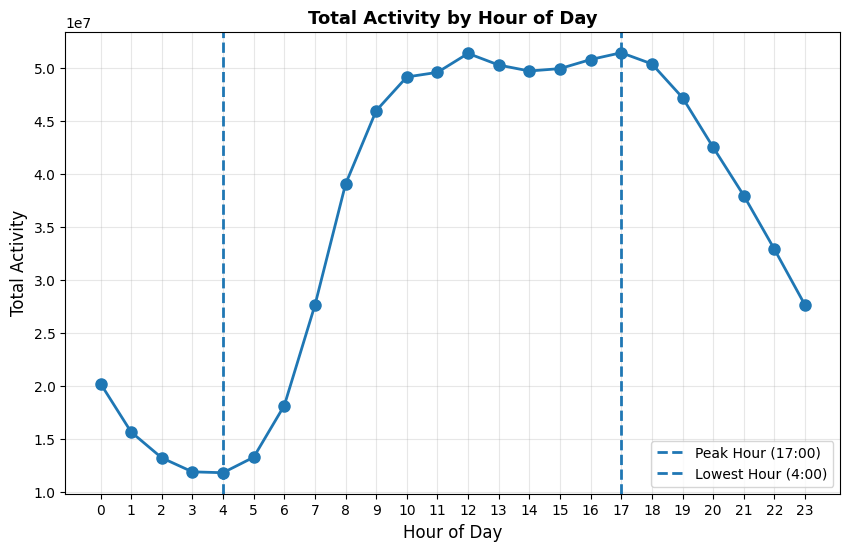

In [36]:
# =============================================================================
# QUESTION 7: Peak Hour Analysis
# =============================================================================
print("="*80)
print("QUESTION 7: PEAK HOUR ANALYSIS")
print("="*80)

# Calculate total activity by hour across all grids
activity_by_hour = combined_df.groupby('hour')['total_activity'].sum().sort_values(ascending=False)

# Question 7a: What is the most common peak hour across all grids?
peak_hour = activity_by_hour.idxmax()
peak_activity = activity_by_hour.max()

print(f"\n Most common peak hour: {peak_hour}:00 (Hour {peak_hour})")
print(f"   Total activity at peak: {peak_activity:,.2f}")

# Question 7b: What hour has the lowest activity?
lowest_hour = activity_by_hour.idxmin()
lowest_activity = activity_by_hour.min()

print(f"\n Hour with lowest activity: {lowest_hour}:00 (Hour {lowest_hour})")
print(f"   Total activity at lowest: {lowest_activity:,.2f}")

# Show hourly activity summary
print("\n" + "="*80)
print("Hourly Activity Summary (All Activities):")
print("="*80)
hourly_summary = combined_df.groupby('hour').agg({
    'total_activity': ['sum', 'mean', 'std', 'min', 'max'],
    'CellID': 'count'
}).round(2)
hourly_summary.columns = ['Total_Activity', 'Mean_Activity', 'Std_Activity', 'Min_Activity', 'Max_Activity', 'Record_Count']
print(hourly_summary)

# Visualization - Total Activity by Hour of Day
plt.figure(figsize=(10, 6))

# Sort data by hour
activity_by_hour_sorted = activity_by_hour.sort_index()

# Plot total activity
plt.plot(
    activity_by_hour_sorted.index,
    activity_by_hour_sorted.values,
    marker='o',
    linewidth=2,
    markersize=8
)

# Mark peak and lowest hours
plt.axvline(
    x=peak_hour,
    linestyle='--',
    linewidth=2,
    label=f'Peak Hour ({peak_hour}:00)'
)
plt.axvline(
    x=lowest_hour,
    linestyle='--',
    linewidth=2,
    label=f'Lowest Hour ({lowest_hour}:00)'
)

# Labels and title
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Activity', fontsize=12)
plt.title('Total Activity by Hour of Day', fontsize=13, fontweight='bold')

# Grid and legend
plt.grid(True, alpha=0.3)
plt.legend()

# X-axis ticks
plt.xticks(range(0, 24))

# Show plot
plt.show()


 Call Statistics by Hour (Question 7c)

In [37]:
# =============================================================================
# QUESTION 7c: Calculate mean, median, std, min, max for total calls by hour
# =============================================================================
print("="*80)
print("QUESTION 7c: CALL STATISTICS BY HOUR")
print("="*80)

# Calculate statistics for total calls by hour
calls_stats_by_hour = combined_df.groupby('hour')['total_calls'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std', 'std'),
    ('Min', 'min'),
    ('Max', 'max'),
    ('Count', 'count')
]).round(4)

print("\n Statistical Summary of Total Calls by Hour:")
print("="*80)
print(calls_stats_by_hour)

# Overall statistics
print("\n" + "="*80)
print(" Overall Call Statistics (Across All Hours):")
print("="*80)
overall_stats = {
    'Mean': combined_df['total_calls'].mean(),
    'Median': combined_df['total_calls'].median(),
    'Std': combined_df['total_calls'].std(),
    'Min': combined_df['total_calls'].min(),
    'Max': combined_df['total_calls'].max()
}
for stat, value in overall_stats.items():
    print(f"  {stat}: {value:.4f}")

# Find interesting patterns
peak_call_hour = calls_stats_by_hour['Mean'].idxmax()
lowest_call_hour = calls_stats_by_hour['Mean'].idxmin()
most_variable_hour = calls_stats_by_hour['Std'].idxmax()

print("\n" + "="*80)
print(" Key Findings:")
print("="*80)
print(f"  • Peak call hour: {peak_call_hour}:00 (Mean: {calls_stats_by_hour.loc[peak_call_hour, 'Mean']:.4f})")
print(f"  • Lowest call hour: {lowest_call_hour}:00 (Mean: {calls_stats_by_hour.loc[lowest_call_hour, 'Mean']:.4f})")
print(f"  • Most variable hour: {most_variable_hour}:00 (Std: {calls_stats_by_hour.loc[most_variable_hour, 'Std']:.4f})")

QUESTION 7c: CALL STATISTICS BY HOUR

 Statistical Summary of Total Calls by Hour:
         Mean   Median      Std     Min        Max   Count
hour                                                      
0     10.2802  13.4253   5.2790  0.0002   223.4941  150207
1      9.9287  13.4253   5.1299  0.0000   141.9847  119415
2      9.8947  13.4253   5.3298  0.0000   210.9691  103908
3      9.9534  13.4253   5.6496  0.0000   298.3541   97566
4     10.2357  13.4253   5.2943  0.0000   255.0555  107494
5     10.0290  13.4253   5.3950  0.0000   177.1690  124507
6     10.3397  13.4253   4.9694  0.0002   201.3488  173260
7     11.4645  13.4253   8.4354  0.0000   412.7314  240986
8     13.2728  13.4253  22.2374  0.0000  1122.7091  318128
9     14.5083  13.4253  35.4988  0.0000  1972.8289  365181
10    14.9236   9.5208  41.3382  0.0000  2402.6425  379767
11    15.0331   8.9081  43.0381  0.0000  2565.0524  380616
12    14.5068   8.5012  41.4180  0.0000  2724.3738  388125
13    13.9884   8.5272  37.6156 

 Daytime vs Nighttime Activity Analysis

In [39]:
# =============================================================================
# QUESTION 8: What percentage of total activity happens during
# daytime (6am-8pm) vs nighttime (8pm-6am)?
# =============================================================================
print("="*80)
print("QUESTION 8: DAYTIME VS NIGHTTIME ACTIVITY ANALYSIS")
print("="*80)

# Define daytime (6am-8pm = hours 6-19) and nighttime (8pm-6am = hours 20-23, 0-5)
daytime_hours = list(range(6, 20))
nighttime_hours = list(range(0, 6)) + list(range(20, 24))

# Calculate total activity for each period
daytime_activity = combined_df[combined_df['hour'].isin(daytime_hours)]['total_activity'].sum()
nighttime_activity = combined_df[combined_df['hour'].isin(nighttime_hours)]['total_activity'].sum()
total_activity_sum = daytime_activity + nighttime_activity

# Calculate percentages
daytime_percentage = (daytime_activity / total_activity_sum) * 100
nighttime_percentage = (nighttime_activity / total_activity_sum) * 100

print(f"\nTime Period Definitions:")
print(f"  Daytime: 6:00 AM - 8:00 PM (hours {min(daytime_hours)}-{max(daytime_hours)})")
print(f"  Nighttime: 8:00 PM - 6:00 AM (hours {nighttime_hours})")

print(f"\n ANSWER:")
print("="*80)
print(f"Daytime Activity (6am-8pm):")
print(f"  Total: {daytime_activity:,.2f}")
print(f"  Percentage: {daytime_percentage:.2f}%")
print(f"\nNighttime Activity (8pm-6am):")
print(f"  Total: {nighttime_activity:,.2f}")
print(f"  Percentage: {nighttime_percentage:.2f}%")
print(f"\nRatio (Daytime/Nighttime): {daytime_activity/nighttime_activity:.2f}x")

# Breakdown by activity type
print("\n" + "="*80)
print("Activity Type Breakdown:")
print("="*80)

activity_types = ['total_sms', 'total_calls', 'total_internet']
breakdown_data = []

for activity_type in activity_types:
    day_val = combined_df[combined_df['hour'].isin(daytime_hours)][activity_type].sum()
    night_val = combined_df[combined_df['hour'].isin(nighttime_hours)][activity_type].sum()
    total_val = day_val + night_val

    breakdown_data.append({
        'Activity': activity_type.replace('total_', '').upper(),
        'Daytime': day_val,
        'Daytime_%': (day_val/total_val)*100,
        'Nighttime': night_val,
        'Nighttime_%': (night_val/total_val)*100
    })

    print(f"\n{activity_type.replace('total_', '').upper()}:")
    print(f"  Daytime: {day_val:,.2f} ({(day_val/total_val)*100:.2f}%)")
    print(f"  Nighttime: {night_val:,.2f} ({(night_val/total_val)*100:.2f}%)")

breakdown_df = pd.DataFrame(breakdown_data)

daytime_df = combined_df[combined_df['hour'].isin(daytime_hours)]
nighttime_df = combined_df[combined_df['hour'].isin(nighttime_hours)]

daytime_peak = daytime_df.groupby('hour')['total_activity'].sum().idxmax()
nighttime_peak = nighttime_df.groupby('hour')['total_activity'].sum().idxmax()

print(f"Peak hour during daytime: {daytime_peak}:00")
print(f"Peak hour during nighttime: {nighttime_peak}:00")

QUESTION 8: DAYTIME VS NIGHTTIME ACTIVITY ANALYSIS

Time Period Definitions:
  Daytime: 6:00 AM - 8:00 PM (hours 6-19)
  Nighttime: 8:00 PM - 6:00 AM (hours [0, 1, 2, 3, 4, 5, 20, 21, 22, 23])

 ANSWER:
Daytime Activity (6am-8pm):
  Total: 631,027,956.64
  Percentage: 73.55%

Nighttime Activity (8pm-6am):
  Total: 226,918,319.77
  Percentage: 26.45%

Ratio (Daytime/Nighttime): 2.78x

Activity Type Breakdown:

SMS:
  Daytime: 77,824,364.49 (77.48%)
  Nighttime: 22,623,213.84 (22.52%)

CALLS:
  Daytime: 68,737,638.69 (78.00%)
  Nighttime: 19,386,432.65 (22.00%)

INTERNET:
  Daytime: 484,465,953.46 (72.38%)
  Nighttime: 184,908,673.28 (27.62%)
Peak hour during daytime: 17:00
Peak hour during nighttime: 20:00


International vs Domestic Call Patterns

QUESTION 9: INTERNATIONAL VS DOMESTIC CALL PATTERNS

Dataset Split:
  Domestic (Italy, code 39): 719,995 records
  International (other codes): 5,844,036 records

 Peak Call Hours:
  Domestic peak: 17:00
  International peak: 12:00

 YES - International and domestic calls have DIFFERENT peak hours!
  Time difference: 5 hour(s)

Hourly Pattern Comparison:
 Hour  Domestic_Calls  International_Calls  Domestic_%  International_%
    0    1.400787e+05         1.404073e+06    0.480145         2.381809
    1    9.761930e+04         1.088012e+06    0.334608         1.845657
    2    1.161369e+05         9.120028e+05    0.398081         1.547083
    3    1.307244e+05         8.403865e+05    0.448082         1.425596
    4    1.293069e+05         9.709658e+05    0.443223         1.647105
    5    9.228045e+04         1.156403e+06    0.316308         1.961672
    6    1.175235e+05         1.673932e+06    0.402833         2.839588
    7    4.414562e+05         2.321321e+06    1.513172         3.93

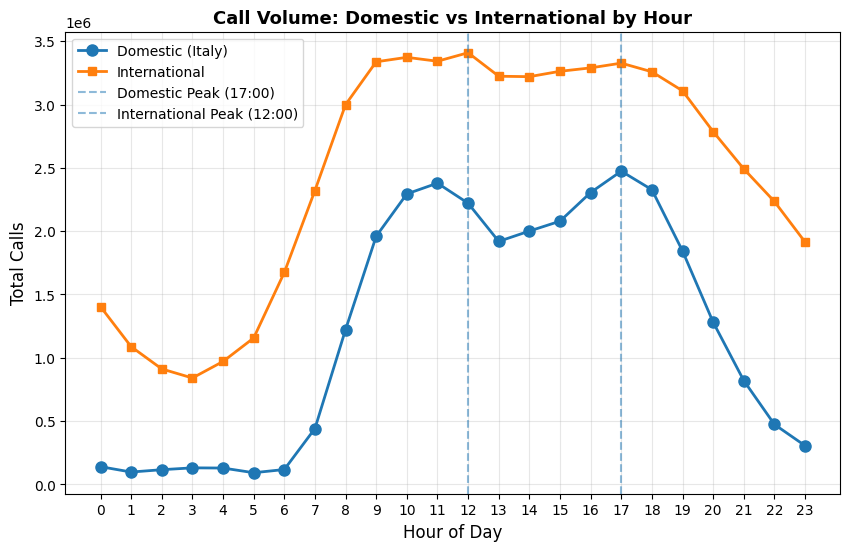


 Key Findings:

Hours when international calls are proportionally higher:
  0:00, 1:00, 2:00, 3:00, 4:00, 5:00, 6:00, 7:00, 8:00, 20:00, 21:00, 22:00, 23:00

Hours when domestic calls are proportionally higher:
  9:00, 10:00, 11:00, 12:00, 13:00, 14:00, 15:00, 16:00, 17:00, 18:00, 19:00

Hour with highest domestic activity proportion: 17:00
Hour with highest international activity proportion: 12:00


In [42]:
# =============================================================================
# QUESTION 9: Do international calls happen at different times than domestic?
# =============================================================================
print("="*80)
print("QUESTION 9: INTERNATIONAL VS DOMESTIC CALL PATTERNS")
print("="*80)

# Domestic = countrycode 39, International = countrycode != 39
domestic_df = combined_df[combined_df['countrycode'] == 39]
international_df = combined_df[combined_df['countrycode'] != 39]

print(f"\nDataset Split:")
print(f"  Domestic (Italy, code 39): {len(domestic_df):,} records")
print(f"  International (other codes): {len(international_df):,} records")

# Calculate hourly patterns for calls
domestic_calls_hourly = domestic_df.groupby('hour')['total_calls'].sum()
international_calls_hourly = international_df.groupby('hour')['total_calls'].sum()

# Normalize to percentages for better comparison
domestic_calls_pct = (domestic_calls_hourly / domestic_calls_hourly.sum()) * 100
international_calls_pct = (international_calls_hourly / international_calls_hourly.sum()) * 100

# Find peak hours
domestic_peak = domestic_calls_hourly.idxmax()
international_peak = international_calls_hourly.idxmax()

print(f"\n Peak Call Hours:")
print(f"  Domestic peak: {domestic_peak}:00")
print(f"  International peak: {international_peak}:00")

if domestic_peak != international_peak:
    print(f"\n YES - International and domestic calls have DIFFERENT peak hours!")
    print(f"  Time difference: {abs(domestic_peak - international_peak)} hour(s)")
else:
    print(f"\n NO - Both have the same peak hour: {domestic_peak}:00")

# Statistical comparison
print("\n" + "="*80)
print("Hourly Pattern Comparison:")
print("="*80)

comparison_df = pd.DataFrame({
    'Hour': range(24),
    'Domestic_Calls': domestic_calls_hourly.values,
    'International_Calls': international_calls_hourly.values,
    'Domestic_%': domestic_calls_pct.values,
    'International_%': international_calls_pct.values
})

print(comparison_df.to_string(index=False))

# Calculate correlation
correlation = np.corrcoef(domestic_calls_hourly.values, international_calls_hourly.values)[0, 1]
print(f"\n Correlation between domestic and international hourly patterns: {correlation:.4f}")

if correlation > 0.8:
    print("  → Strong positive correlation - similar patterns")
elif correlation > 0.5:
    print("  → Moderate positive correlation - somewhat similar patterns")
else:
    print("  → Weak correlation - different patterns")

# Visualization - Call Volume: Domestic vs International by Hour
plt.figure(figsize=(10, 6))

# Plot domestic calls
plt.plot(
    domestic_calls_hourly.index,
    domestic_calls_hourly.values,
    marker='o',
    linewidth=2,
    markersize=8,
    label='Domestic (Italy)'
)

# Plot international calls
plt.plot(
    international_calls_hourly.index,
    international_calls_hourly.values,
    marker='s',
    linewidth=2,
    markersize=6,
    label='International'
)

# Peak hour markers
plt.axvline(
    x=domestic_peak,
    linestyle='--',
    alpha=0.5,
    label=f'Domestic Peak ({domestic_peak}:00)'
)
plt.axvline(
    x=international_peak,
    linestyle='--',
    alpha=0.5,
    label=f'International Peak ({international_peak}:00)'
)

# Labels and title
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Calls', fontsize=12)
plt.title('Call Volume: Domestic vs International by Hour', fontsize=13, fontweight='bold')

# Grid, legend, and ticks
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(range(0, 24))

# Show plot
plt.show()


# Additional insights
print("\n" + "="*80)
print(" Key Findings:")
print("="*80)

# Find hours where international calls are proportionally higher
intl_dominant_hours = comparison_df[comparison_df['International_%'] > comparison_df['Domestic_%']]['Hour'].tolist()
dom_dominant_hours = comparison_df[comparison_df['Domestic_%'] > comparison_df['International_%']]['Hour'].tolist()

print(f"\nHours when international calls are proportionally higher:")
print(f"  {', '.join([f'{h}:00' for h in intl_dominant_hours]) if intl_dominant_hours else 'None'}")

print(f"\nHours when domestic calls are proportionally higher:")
print(f"  {', '.join([f'{h}:00' for h in dom_dominant_hours]) if dom_dominant_hours else 'None'}")

# Time shift analysis
max_diff_hour = comparison_df.loc[comparison_df['Domestic_%'].idxmax(), 'Hour']
print(f"\nHour with highest domestic activity proportion: {int(max_diff_hour)}:00")

max_intl_hour = comparison_df.loc[comparison_df['International_%'].idxmax(), 'Hour']
print(f"Hour with highest international activity proportion: {int(max_intl_hour)}:00")

 Statistical Comparisons Using NumPy

In [44]:
# =============================================================================
# QUESTION 10: Use numpy to perform statistical comparisons
# =============================================================================
print("="*80)
print("QUESTION 10: STATISTICAL COMPARISONS USING NUMPY")
print("="*80)

# =============================================================================
# PART 1: Domestic vs International Calls
# =============================================================================
print("\n" + "="*80)
print("PART 1: DOMESTIC (ITALY) VS INTERNATIONAL ANALYSIS")
print("="*80)

# Split data
domestic_data = combined_df[combined_df['countrycode'] == 39]
international_data = combined_df[combined_df['countrycode'] != 39]

# Question: What percentage of calls are international vs domestic?
total_calls_domestic = domestic_data['total_calls'].sum()
total_calls_international = international_data['total_calls'].sum()
total_calls_all = total_calls_domestic + total_calls_international

pct_domestic_calls = (total_calls_domestic / total_calls_all) * 100
pct_international_calls = (total_calls_international / total_calls_all) * 100

print(f"\n CALLS - Domestic vs International:")
print(f"  Domestic calls: {total_calls_domestic:,.2f} ({pct_domestic_calls:.2f}%)")
print(f"  International calls: {total_calls_international:,.2f} ({pct_international_calls:.2f}%)")
print(f"  Total calls: {total_calls_all:,.2f}")

# Question: What percentage of SMS are international vs domestic?
total_sms_domestic = domestic_data['total_sms'].sum()
total_sms_international = international_data['total_sms'].sum()
total_sms_all = total_sms_domestic + total_sms_international

pct_domestic_sms = (total_sms_domestic / total_sms_all) * 100
pct_international_sms = (total_sms_international / total_sms_all) * 100

print(f"\n SMS - Domestic vs International:")
print(f"  Domestic SMS: {total_sms_domestic:,.2f} ({pct_domestic_sms:.2f}%)")
print(f"  International SMS: {total_sms_international:,.2f} ({pct_international_sms:.2f}%)")
print(f"  Total SMS: {total_sms_all:,.2f}")

# Question: Are international calls more incoming or outgoing (calculate the ratio)
# For international calls
intl_incoming = international_data['callin'].sum()
intl_outgoing = international_data['callout'].sum()
intl_ratio = intl_incoming / intl_outgoing if intl_outgoing > 0 else 0

print(f"\n INTERNATIONAL CALLS - Incoming vs Outgoing:")
print(f"  Incoming: {intl_incoming:,.2f}")
print(f"  Outgoing: {intl_outgoing:,.2f}")
print(f"  Ratio (Incoming/Outgoing): {intl_ratio:.4f}")

if intl_ratio > 1:
    print(f"  → International calls are MORE INCOMING ({((intl_ratio-1)*100):.2f}% more)")
elif intl_ratio < 1:
    print(f"  → International calls are MORE OUTGOING ({((1-intl_ratio)*100):.2f}% more)")
else:
    print(f"  → Perfectly balanced")

# For comparison, also show domestic
dom_incoming = domestic_data['callin'].sum()
dom_outgoing = domestic_data['callout'].sum()
dom_ratio = dom_incoming / dom_outgoing if dom_outgoing > 0 else 0

print(f"\n DOMESTIC CALLS - Incoming vs Outgoing (for comparison):")
print(f"  Incoming: {dom_incoming:,.2f}")
print(f"  Outgoing: {dom_outgoing:,.2f}")
print(f"  Ratio (Incoming/Outgoing): {dom_ratio:.4f}")

# Statistical comparison using numpy
print("\n" + "="*80)
print("NumPy Statistical Analysis:")
print("="*80)

# Calculate statistics using numpy
domestic_calls_array = domestic_data['total_calls'].values
international_calls_array = international_data['total_calls'].values

stats_comparison = {
    'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Variance'],
    'Domestic': [
        np.mean(domestic_calls_array),
        np.median(domestic_calls_array),
        np.std(domestic_calls_array),
        np.min(domestic_calls_array),
        np.max(domestic_calls_array),
        np.var(domestic_calls_array)
    ],
    'International': [
        np.mean(international_calls_array),
        np.median(international_calls_array),
        np.std(international_calls_array),
        np.min(international_calls_array),
        np.max(international_calls_array),
        np.var(international_calls_array)
    ]
}

stats_df = pd.DataFrame(stats_comparison)
print(stats_df.to_string(index=False))

QUESTION 10: STATISTICAL COMPARISONS USING NUMPY

PART 1: DOMESTIC (ITALY) VS INTERNATIONAL ANALYSIS

 CALLS - Domestic vs International:
  Domestic calls: 29,174,229.90 (33.11%)
  International calls: 58,949,841.43 (66.89%)
  Total calls: 88,124,071.34

 SMS - Domestic vs International:
  Domestic SMS: 25,092,955.54 (24.98%)
  International SMS: 75,354,622.80 (75.02%)
  Total SMS: 100,447,578.33

 INTERNATIONAL CALLS - Incoming vs Outgoing:
  Incoming: 36,911,800.81
  Outgoing: 22,038,040.62
  Ratio (Incoming/Outgoing): 1.6749
  → International calls are MORE INCOMING (67.49% more)

 DOMESTIC CALLS - Incoming vs Outgoing (for comparison):
  Incoming: 13,884,633.39
  Outgoing: 15,289,596.52
  Ratio (Incoming/Outgoing): 0.9081

NumPy Statistical Analysis:
  Metric    Domestic  International
    Mean   40.520045      10.087180
  Median   10.983800      13.425298
 Std Dev   93.289234       3.805149
     Min    0.000000       0.000000
     Max 2724.373800     105.010500
Variance 8702.88120

Correlation Analysis Between Activity Types

PART 2: CORRELATION ANALYSIS - SMS VS CALLS AT GRID LEVEL

Analyzing 10000 unique grid squares...

 CORRELATION ANALYSIS:
SMS vs Calls correlation: 0.9862
Interpretation: Strong positive correlation - SMS and calls tend to occur together

Additional Correlations (for context):
  SMS vs Internet: 0.9455
  Calls vs Internet: 0.9379

 Full Correlation Matrix:
               SMS     Calls  Internet
SMS       1.000000  0.986235  0.945530
Calls     0.986235  1.000000  0.937902
Internet  0.945530  0.937902  1.000000

 Grid-Level Statistics:
           total_sms   total_calls  total_internet
count   10000.000000  10000.000000    10000.000000
mean    10044.757833   8812.407134    66937.462674
std      7184.090676   6311.820475    60775.456545
min      1044.884327   1362.961520     9862.405363
25%      5900.138775   5207.079931    33571.347349
50%      8243.931755   7185.213454    49233.422652
75%     11814.511083  10252.027503    74632.489797
max    103730.247131  92429.740423   770028.511040



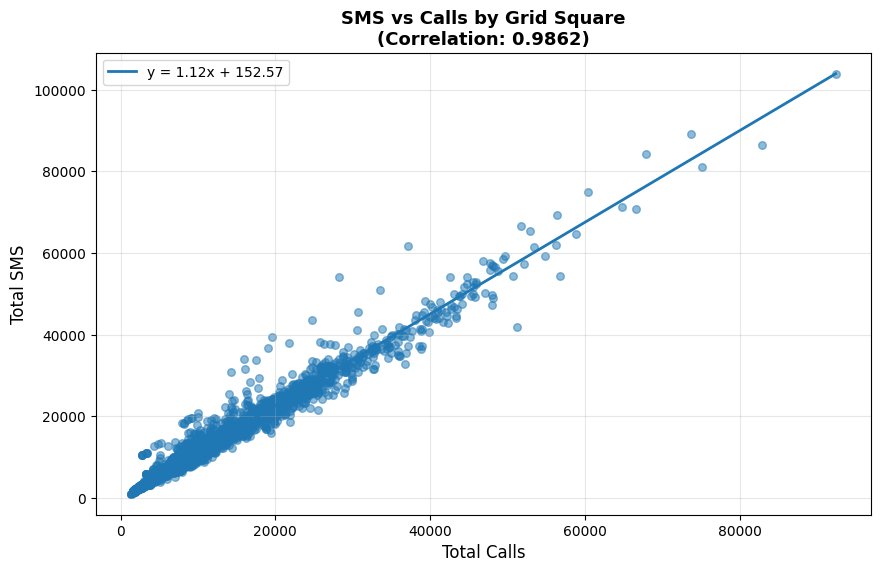


 Key Findings:
1. SMS and Calls correlation: 0.9862 - Strong positive correlation - SMS and calls tend to occur together
2. Linear relationship: For every 1 call, there are approximately 1.12 SMS messages
3. Total grid squares analyzed: 10000


In [50]:
# =============================================================================
# PART 2: Correlation between SMS and Call volume at grid level
# =============================================================================
print("="*80)
print("PART 2: CORRELATION ANALYSIS - SMS VS CALLS AT GRID LEVEL")
print("="*80)

# Aggregate by grid square (CellID)
grid_activity = combined_df.groupby('CellID').agg({
    'total_sms': 'sum',
    'total_calls': 'sum',
    'total_internet': 'sum',
    'total_activity': 'sum'
}).reset_index()

print(f"\nAnalyzing {len(grid_activity)} unique grid squares...")

# Calculate correlation using numpy
sms_array = grid_activity['total_sms'].values
calls_array = grid_activity['total_calls'].values
internet_array = grid_activity['total_internet'].values

# Correlation between SMS and Calls
correlation_sms_calls = np.corrcoef(sms_array, calls_array)[0, 1]

print(f"\n CORRELATION ANALYSIS:")
print("="*80)
print(f"SMS vs Calls correlation: {correlation_sms_calls:.4f}")

if correlation_sms_calls > 0.8:
    interpretation = "Strong positive correlation - SMS and calls tend to occur together"
elif correlation_sms_calls > 0.5:
    interpretation = "Moderate positive correlation - some relationship between SMS and calls"
elif correlation_sms_calls > 0.2:
    interpretation = "Weak positive correlation - slight relationship"
elif correlation_sms_calls < -0.5:
    interpretation = "Negative correlation - inverse relationship"
else:
    interpretation = "Very weak or no correlation"

print(f"Interpretation: {interpretation}")

# Additional correlations for comprehensive analysis
correlation_sms_internet = np.corrcoef(sms_array, internet_array)[0, 1]
correlation_calls_internet = np.corrcoef(calls_array, internet_array)[0, 1]

print(f"\nAdditional Correlations (for context):")
print(f"  SMS vs Internet: {correlation_sms_internet:.4f}")
print(f"  Calls vs Internet: {correlation_calls_internet:.4f}")

# Create correlation matrix
correlation_matrix = np.corrcoef([sms_array, calls_array, internet_array])
print(f"\n Full Correlation Matrix:")
print("="*80)
corr_df = pd.DataFrame(correlation_matrix,
                       columns=['SMS', 'Calls', 'Internet'],
                       index=['SMS', 'Calls', 'Internet'])
print(corr_df)

# Statistical summary by grid
print(f"\n Grid-Level Statistics:")
print("="*80)
print(grid_activity[['total_sms', 'total_calls', 'total_internet']].describe())

# Linear regression using numpy
coefficients = np.polyfit(calls_array, sms_array, 1)
slope, intercept = coefficients

print(f"\n Linear Regression (SMS vs Calls):")
print(f"  Equation: SMS = {slope:.4f} * Calls + {intercept:.2f}")
print(f"  Slope: {slope:.4f} (for every 1 unit increase in calls, SMS increases by {slope:.4f})")

# Visualization - SMS vs Calls with regression line
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(
    calls_array,
    sms_array,
    alpha=0.5,
    s=30
)

# Regression line
x_line = np.linspace(calls_array.min(), calls_array.max(), 100)
y_line = slope * x_line + intercept
plt.plot(
    x_line,
    y_line,
    linewidth=2,
    label=f'y = {slope:.2f}x + {intercept:.2f}'
)

# Labels and title
plt.xlabel('Total Calls', fontsize=12)
plt.ylabel('Total SMS', fontsize=12)
plt.title(
    f'SMS vs Calls by Grid Square\n(Correlation: {correlation_sms_calls:.4f})',
    fontsize=13,
    fontweight='bold'
)

# Grid and legend
plt.grid(True, alpha=0.3)
plt.legend()

# Show plot
plt.show()

print("\n" + "="*80)
print(" Key Findings:")
print("="*80)
print(f"1. SMS and Calls correlation: {correlation_sms_calls:.4f} - {interpretation}")
print(f"2. Linear relationship: For every 1 call, there are approximately {slope:.2f} SMS messages")
print(f"3. Total grid squares analyzed: {len(grid_activity)}")